#### Частина 1. Data Cleaning and EDA

In [1]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt 
import seaborn as sns 

import random
random.seed(42) 

import warnings
warnings.filterwarnings('ignore')

import os

In [2]:
data_path = "ab_test.csv"
if os.path.exists(data_path):
    df = pd.read_csv(data_path) #  encode = 'utf-8'
else:
    raise NameError(f'File {data_path} not found')

In [3]:
df.head()

,id,time,con_treat,page,converted
0,851104,11:48.6,control,old_page,0
1,804228,01:45.2,control,old_page,0
2,661590,55:06.2,treatment,new_page,0
3,853541,28:03.1,treatment,new_page,0
4,864975,52:26.2,control,old_page,1


In [4]:
df.columns = ["user_id", "timestamp", "group", "landing_page", "converted"] # rename
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,11:48.6,control,old_page,0
1,804228,01:45.2,control,old_page,0
2,661590,55:06.2,treatment,new_page,0
3,853541,28:03.1,treatment,new_page,0
4,864975,52:26.2,control,old_page,1


In [5]:
df.isna().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

In [6]:
df.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

In [39]:
# np.isinf(df).any()

In [7]:
df.tail(2)

,user_id,timestamp,group,landing_page,converted
294476,697314,20:29.0,control,old_page,0
294477,715931,40:24.5,treatment,new_page,0


In [8]:
df.sample(4)

,user_id,timestamp,group,landing_page,converted
80512,726339,35:36.5,control,old_page,0
97810,713134,22:59.4,control,old_page,0
208001,709519,22:37.6,treatment,new_page,0
27742,734373,35:11.1,control,old_page,0


In [9]:
df.shape

(294478, 5)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       294478 non-null  int64 
 1   timestamp     294478 non-null  object
 2   group         294478 non-null  object
 3   landing_page  294478 non-null  object
 4   converted     294478 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


In [11]:
df['timestamp'].max(), df['timestamp'].min()

('59:59.9', '00:00.0')

In [12]:
df.describe()

,user_id,converted
count,294478.000000,294478.000000
mean,787974.124733,0.119659
std,91210.823776,0.324563
min,630000.000000,0.000000
25%,709032.250000,0.000000
50%,787933.500000,0.000000
75%,866911.750000,0.000000
max,945999.000000,1.000000


In [13]:
df.columns

Index(['user_id', 'timestamp', 'group', 'landing_page', 'converted'], dtype='object')

In [76]:
convert_df = df.groupby('landing_page')['converted'].sum().reset_index()
convert_df 

,landing_page,converted
0,new_page,17498
1,old_page,17739


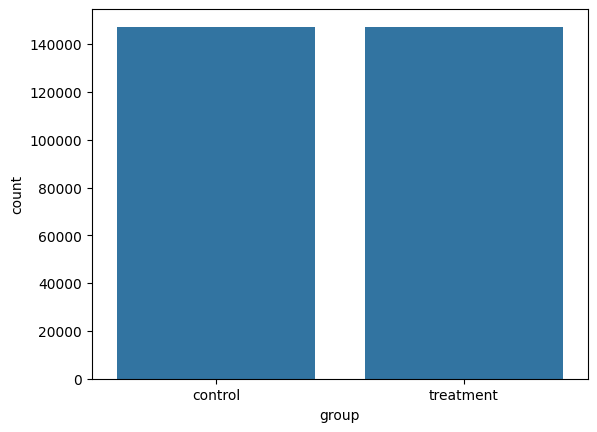

In [16]:
sns.countplot(x = df['group']);

In [17]:
df.columns

Index(['user_id', 'timestamp', 'group', 'landing_page', 'converted'], dtype='object')

In [18]:
df.head(1)

,user_id,timestamp,group,landing_page,converted
0,851104,11:48.6,control,old_page,0


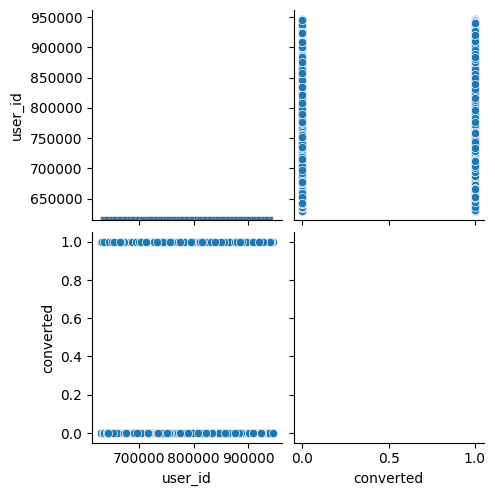

In [19]:
sns.pairplot(df);

In [21]:
print(f'Number of rows: {df.shape[0]}') # Кількість рядків:
print(f'Number of unique users: {df.user_id.nunique()}') #Кількість унікальних користувачів:

Number of rows: 294478
Number of unique users: 290584


In [ ]:
# Чи збігаються номери new_page та treatment?
n_treat = df[df["group"] == "treatment"].shape[0] 
n_new_page = df[df["landing_page"] == "new_page"].shape[0]
difference = n_treat - n_new_page

pd.DataFrame({
    'N treatment': [n_treat],
    'N new_page': [n_new_page],
    'Difference': [difference]
})

,N treatment,N new_page,Difference
0,147276,147239,37


In [42]:
# unmatch 
df[(df["group"] == "treatment") & (df["landing_page"] == "old_page")]

,user_id,timestamp,group,landing_page,converted
308,857184,34:59.8,treatment,old_page,0
327,686623,26:40.7,treatment,old_page,0
357,856078,29:30.4,treatment,old_page,0
685,666385,11:54.8,treatment,old_page,0
713,748761,47:44.4,treatment,old_page,0
...,...,...,...,...,...
293773,688144,34:50.5,treatment,old_page,1
293817,876037,15:09.0,treatment,old_page,1
293917,738357,37:55.7,treatment,old_page,0
294014,813406,25:33.2,treatment,old_page,0


In [23]:
df_mismatch = df[(df["group"] == "treatment") & (df["landing_page"] == "old_page")
               |(df["group"] == "control") & (df["landing_page"] == "new_page")]

n_mismatch = df_mismatch.shape[0]

percent_mismatch = round(n_mismatch / len(df) * 100, 2)
print(f'Number of mismatched rows: {n_mismatch} rows') # Кількість невідповідних рядків
print(f'Percent of mismatched rows: {percent_mismatch} percent') #Відсоток невідповідних рядків

Number of mismatched rows: 3893 rows
Percent of mismatched rows: 1.32 percent


In [24]:
df2 = df[(df["group"] == "treatment") & (df["landing_page"] == "new_page")
        |(df["group"] == "control") & (df["landing_page"] == "old_page")]

len(df2), len(df)

(290585, 294478)

In [25]:
df2

,user_id,timestamp,group,landing_page,converted
0,851104,11:48.6,control,old_page,0
1,804228,01:45.2,control,old_page,0
2,661590,55:06.2,treatment,new_page,0
3,853541,28:03.1,treatment,new_page,0
4,864975,52:26.2,control,old_page,1
...,...,...,...,...,...
294473,751197,28:38.6,control,old_page,0
294474,945152,51:57.1,control,old_page,0
294475,734608,45:03.4,control,old_page,0
294476,697314,20:29.0,control,old_page,0


In [27]:
df2['user_id'].value_counts()

user_id
773192    2
679687    1
719014    1
909437    1
905617    1
         ..
751197    1
945152    1
734608    1
697314    1
936923    1
Name: count, Length: 290584, dtype: int64

In [28]:
df2[df2.duplicated("user_id") == True]

,user_id,timestamp,group,landing_page,converted
2893,773192,55:59.6,treatment,new_page,0


#### Частина 2. Probability

In [29]:
df2.converted.mean() * 100

np.float64(11.959667567149026)

In [30]:
df2.user_id = df2.user_id.astype(str)
# df2.groupby("group").mean()

In [65]:
df2.groupby('group')['converted'].mean() * 100.0

group
control      12.038630
treatment    11.880725
Name: converted, dtype: float64

In [70]:
df2.groupby("group")['user_id'].count()

group
control      145274
treatment    145311
Name: user_id, dtype: int64

In [31]:
pd.DataFrame(df2.landing_page.value_counts(normalize = True) * 100)

,proportion
landing_page,
new_page,50.006366
old_page,49.993634


> Чи є достатньо доказів, щоб зробити висновок, що нова сторінка призводить до більшої кількості конверсій? \
> Імовірність того, що особа отримала нову сторінку, становить 50%. \
> Імовірність того, що особа здійснить конверсію незалежно від сторінки, яку вона отримала, становить 11,96%. \
> Враховуючи, що особа перебувала в контрольній групі, ймовірність її конверсії становить 12,04%. \
> Враховуючи, що особа перебувала в групі , ймовірність її конверсії становить 11,88%. \
> 1 до 4 свідчить про те, що між групою  та контрольною групою немає істотної різниці в конверсії. Отже, ми можемо зробити висновок, що нова сторінка  не має впливу і не призводить до збільшення кількості конверсій.


#### Частина 3. A/B Test

In [32]:
means_diff = []
size = df2.shape[0]
for _ in range(10_00):
    sample = df2.sample(size, replace = True)
    control_mean = sample[sample["group"] == "control"]["converted"].mean()
    treat_mean = sample[sample["group"] == "treatment"]["converted"].mean()
    means_diff.append(treat_mean - control_mean)

In [33]:
means_diff = np.array(means_diff)
null_vals = np.random.normal(0, means_diff.std(), means_diff.size)

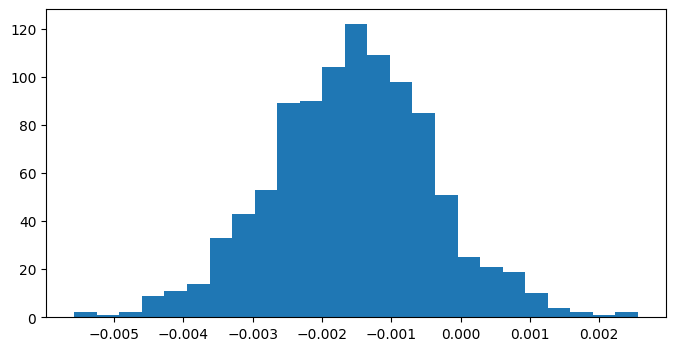

In [34]:
plt.figure(figsize = (8,4), dpi = 100)
plt.hist(means_diff, bins = 25)
plt.show()

In [114]:
# plt.figure(figsize = (8,4), dpi = 100)
# plt.hist(null_vals, bins = 25)
# plt.show()

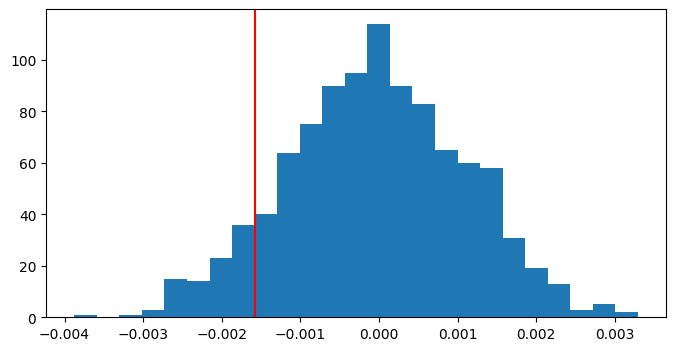

In [35]:
control_mean = df2[df2["group"] == "control"]["converted"].mean()
treat_mean = df2[df2["group"] == "treatment"]["converted"].mean()
obs_diff = treat_mean - control_mean

plt.figure(figsize = (8,4), dpi = 100)
plt.hist(null_vals, bins = 25)
plt.axvline(obs_diff, c='red')
plt.show()

In [36]:
(null_vals > obs_diff).mean()

np.float64(0.906)

In [37]:
pd.crosstab(df2["group"], df2["landing_page"])

landing_page,new_page,old_page
group,,
control,0,145274
treatment,145311,0


In [38]:
conv = df2.groupby("group")["converted"].agg(["sum", "count"])
conv

,sum,count
group,,
control,17489,145274
treatment,17264,145311


In [39]:
control = df2[df2.group == "control"]["converted"]
treat   = df2[df2.group == "treatment"]["converted"]

In [40]:
n_c = len(control)
n_t = len(treat)

x_c = control.sum()
x_t = treat.sum()

In [41]:
# Рахуємо конверсію 
p_c = x_c / n_c
p_t = x_t / n_t

p_c, p_t, p_t - p_c


(np.float64(0.1203863045004612),
 np.float64(0.11880724790277405),
 np.float64(-0.0015790565976871451))

In [46]:
# Chi2
# H0 - між А і B в нас не має 
# H1 - різниця є
# x^2 = sum(O - E^2 / E)
from scipy.stats import chi2_contingency
table = pd.crosstab(df["group"], df["converted"])
chi2, p_value, dof, expected = chi2_contingency(table) # a = 0.05 chi2, p_value # a = 0.05 
chi2, p_value


(np.float64(1.5159618356336582), np.float64(0.2182316121631168))

In [87]:
# Fisher 
from scipy.stats import fisher_exact

odds_ratio, p_value = fisher_exact(table)
odds_ratio, p_value


(np.float64(1.0151099413319618), np.float64(0.19047607131914912))

In [ ]:
mde = (z_alpha + z_beta) * np.sqrt(2 * p0 * (1 - p0) / n)

mde

---
#### Self practise

In [ ]:
# Index
# user id User ID (unique)

# test group: If "ad" the person saw the advertisement, if "psa" they only saw the public service announcement

# converted: If a person bought the product then True, else is False

# total ads: Amount of ads seen by person

# most ads day: Day that the person saw the biggest amount of ads

# most ads hour: Hour of day that the person saw the biggest amount of ads

---
#### Part 1. Data Cleaning and EDA

In [25]:
import matplotlib.pyplot as plt
import pandas as pd

In [52]:
df_p = pd.read_csv('marketing_AB.csv')

In [53]:
df_p.head()

,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
0,0,1069124,ad,False,130,Monday,20
1,1,1119715,ad,False,93,Tuesday,22
2,2,1144181,ad,False,21,Tuesday,18
3,3,1435133,ad,False,355,Tuesday,10
4,4,1015700,ad,False,276,Friday,14


In [54]:
df_p.shape

(588101, 7)

In [55]:
df_p.isna().sum()


Unnamed: 0       0
user id          0
test group       0
converted        0
total ads        0
most ads day     0
most ads hour    0
dtype: int64

In [56]:
df_p.isnull().sum()

Unnamed: 0       0
user id          0
test group       0
converted        0
total ads        0
most ads day     0
most ads hour    0
dtype: int64

In [58]:
df_p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588101 entries, 0 to 588100
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Unnamed: 0     588101 non-null  int64 
 1   user id        588101 non-null  int64 
 2   test group     588101 non-null  object
 3   converted      588101 non-null  bool  
 4   total ads      588101 non-null  int64 
 5   most ads day   588101 non-null  object
 6   most ads hour  588101 non-null  int64 
dtypes: bool(1), int64(4), object(2)
memory usage: 27.5+ MB


In [59]:
df_p.describe()

,Unnamed: 0,user id,total ads,most ads hour
count,588101.000000,5.881010e+05,588101.000000,588101.000000
mean,294050.000000,1.310692e+06,24.820876,14.469061
std,169770.279668,2.022260e+05,43.715181,4.834634
min,0.000000,9.000000e+05,1.000000,0.000000
25%,147025.000000,1.143190e+06,4.000000,11.000000
50%,294050.000000,1.313725e+06,13.000000,14.000000
75%,441075.000000,1.484088e+06,27.000000,18.000000
max,588100.000000,1.654483e+06,2065.000000,23.000000


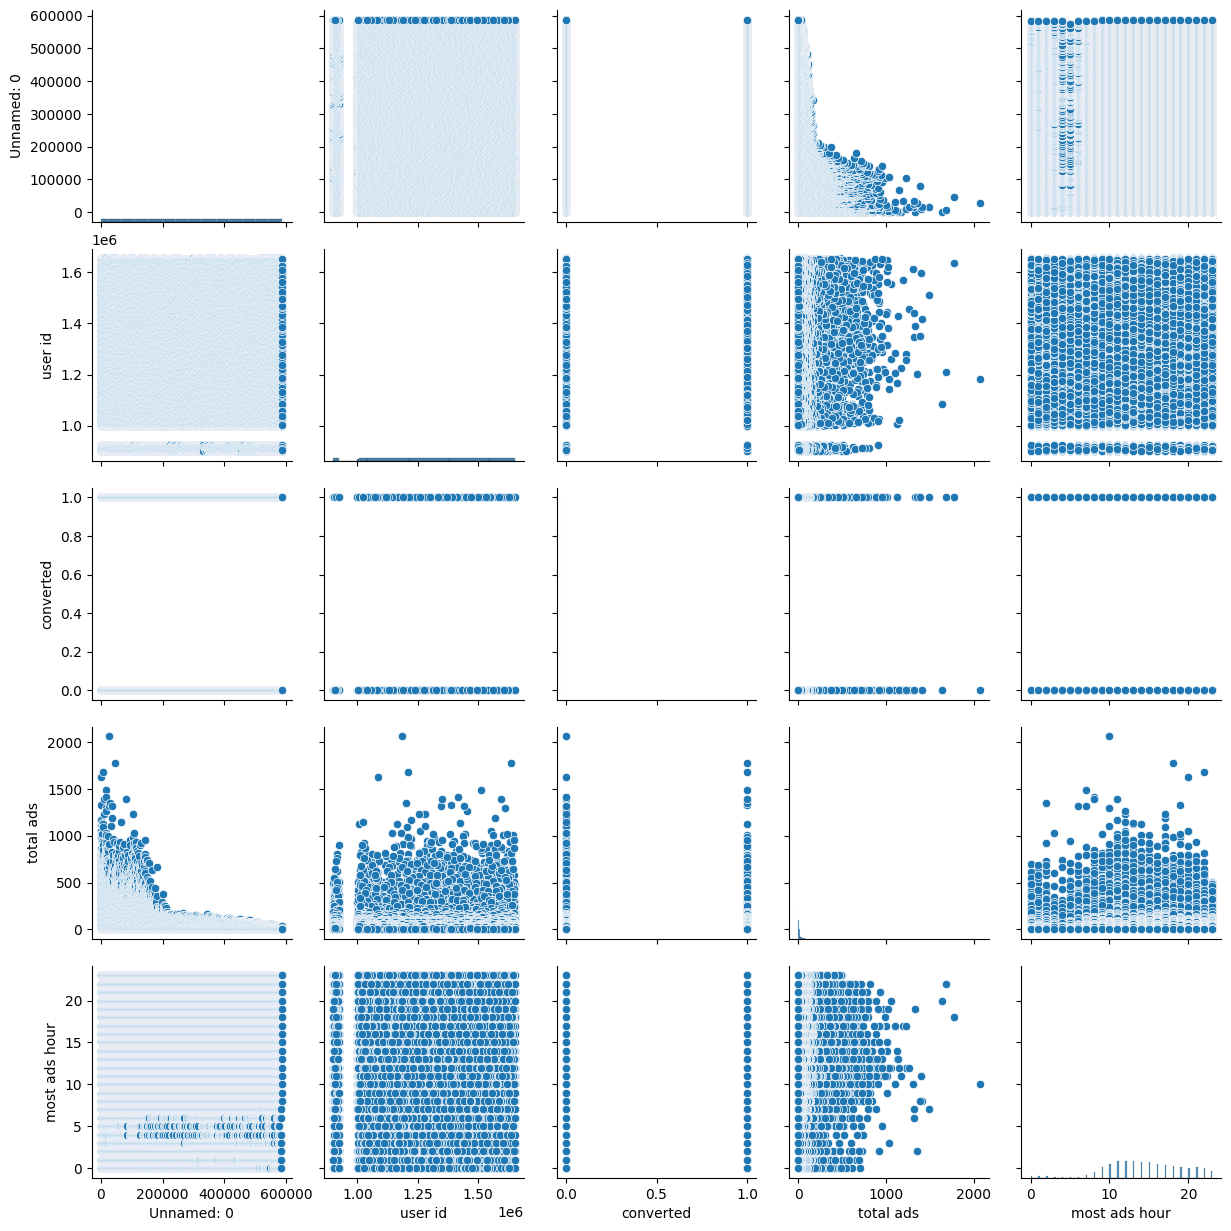

In [68]:
sns.pairplot(df_p);

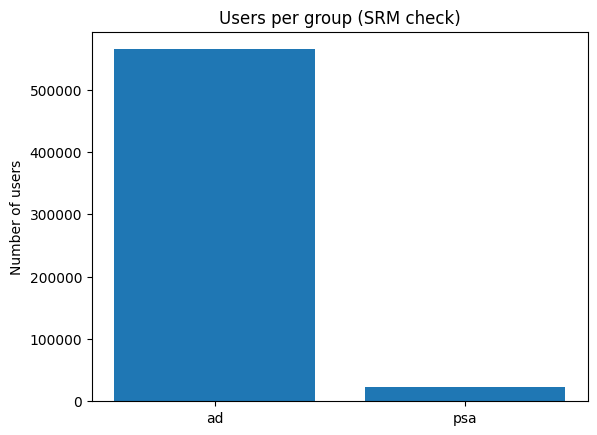

In [69]:
# SRM
import matplotlib.pyplot as plt

group_counts = df_p["test group"].value_counts()

plt.bar(group_counts.index, group_counts.values)
plt.title("Users per group (SRM check)")
plt.ylabel("Number of users")
plt.show()


In [70]:
pd.crosstab(df_p["test group"], df_p["converted"]) #Ми побудували перехресну таблицю, яка показує, скільки користувачів кожній групі (ad/psa) мають converted = 0 і converted = 1.

converted,False,True
test group,,
ad,550154,14423
psa,23104,420


In [71]:
df_p.groupby('test group')['converted'].count().reset_index(drop = True) # згрупували групи по converted і порахували їх кількість в кожній групі

0    564577
1     23524
Name: converted, dtype: int64

In [72]:
conversion = df_p["converted"].mean()   # якщо converted = 0/1
print(f'Загальна конверсія: {conversion}')

Загальна конверсія: 0.02523886203220195


In [73]:
conv_by_group = df_p.groupby("test group")["converted"].mean() * 100
print(f'Конверсія по групах: {conv_by_group}')

Конверсія по групах: test group
ad     2.554656
psa    1.785411
Name: converted, dtype: float64


In [74]:
ct = pd.crosstab(df["test group"], df["converted"])
ct.plot(kind="bar", stacked=True)
plt.grid()
plt.xticks(rotation=45)
plt.ylabel("Users")
plt.show()


KeyError: 'test group'

In [ ]:
# Check NaN, Inf, Null, Duplicated 

# you code
df_clean = df.copy()
df_clean.replace([np.inf, -np.inf], np.nan, inplace=True)
df_clean.drop_duplicates(inplace=True)

# Create variable df_clear -> save result after cleaning
df_clean

,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
0,0,1069124,ad,False,130,Monday,20
1,1,1119715,ad,False,93,Tuesday,22
2,2,1144181,ad,False,21,Tuesday,18
3,3,1435133,ad,False,355,Tuesday,10
4,4,1015700,ad,False,276,Friday,14
...,...,...,...,...,...,...,...
588096,588096,1278437,ad,False,1,Tuesday,23
588097,588097,1327975,ad,False,1,Tuesday,23
588098,588098,1038442,ad,False,3,Tuesday,23
588099,588099,1496395,ad,False,1,Tuesday,23


In [ ]:
# скільки унікальних груп у кожного user_id
grp_cnt = df_clean.groupby("user id")["test group"].nunique()

# user_id, які були в >1 групі
users_in_both = grp_cnt[grp_cnt > 1].index

print("Користувачі в обох групах:", len(users_in_both))

Користувачі в обох групах: 0


---
#### Part 2. Probability

In [ ]:
df_clean.converted.mean() * 100

np.float64(2.523886203220195)

In [ ]:
df_clean["converted"].mean() * 100 # бо converted = 0/1


np.float64(2.523886203220195)

In [ ]:
df_clean.groupby("test group")["converted"].mean() * 100 # згрупували дані за test group і порахували середнє converted у кожній групі

test group
ad     2.554656
psa    1.785411
Name: converted, dtype: float64

In [ ]:
df_clean["converted"].value_counts() * check normalize 
# plt.title("Converted distribution (0/1)")
# plt.xticks([0,1], ["Not converted", "Converted"], rotation=0)
# plt.show()


In [77]:
p = df_clean["converted"].mean()  # бо converted = 0/1
print(p)

NameError: name 'df_clean' is not defined

In [ ]:
df_clean.groupby('test group')['converted'].mean() * 100.0

test group
ad     2.554656
psa    1.785411
Name: converted, dtype: float64

In [ ]:
# task
cr = df_clean. # calculate group converted mean
# plt.bar(cr.index, cr.values)
# plt.title("Conversion Rate by Group")
# plt.ylabel("Conversion rate")
# plt.ylim(0, cr.max() * 1.2)
# plt.show()


---
#### Part 3. A/B test

In [ ]:
# Порахувати: Конверсія та uplift



In [ ]:
# Зробити chi^2 test, bootstrap, z-test